In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FoodWasteRecyleDataWithGDP-Population2002-2023.csv to FoodWasteRecyleDataWithGDP-Population2002-2023.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('singapore_food_waste_data.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'singapore_food_waste_data.csv'

Total Surplus Quantity by Location (Sorted Descending):
       Location  Surplus Quantity (kg)
9     Tampines                    530
3   East Coast                    505
6      Orchard                    450
0  Bukit Timah                    410
1      Central                    350
5   North East                    280
2       Changi                    270
8   South West                    220
4  Jurong East                    190
7   Paya Lebar                    125


<ipython-input-11-4c917a6d7b42>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Location", y="Surplus Quantity (kg)", data=location_surplus, palette="viridis")


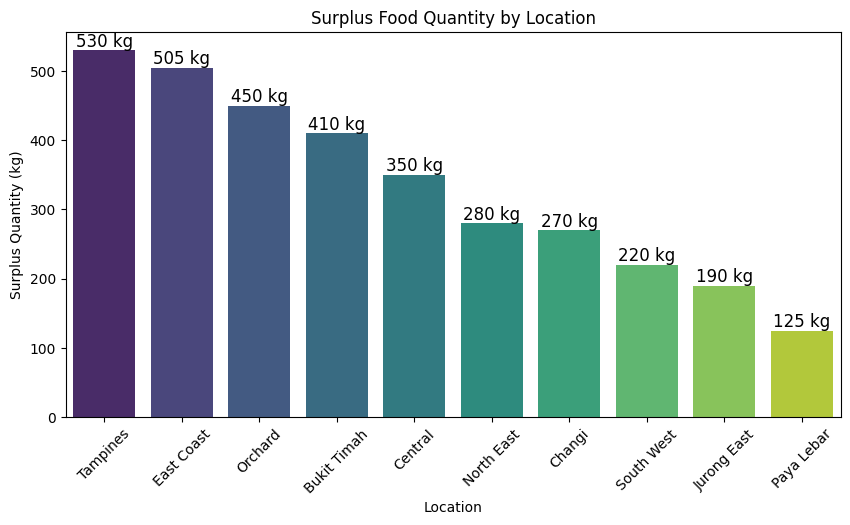

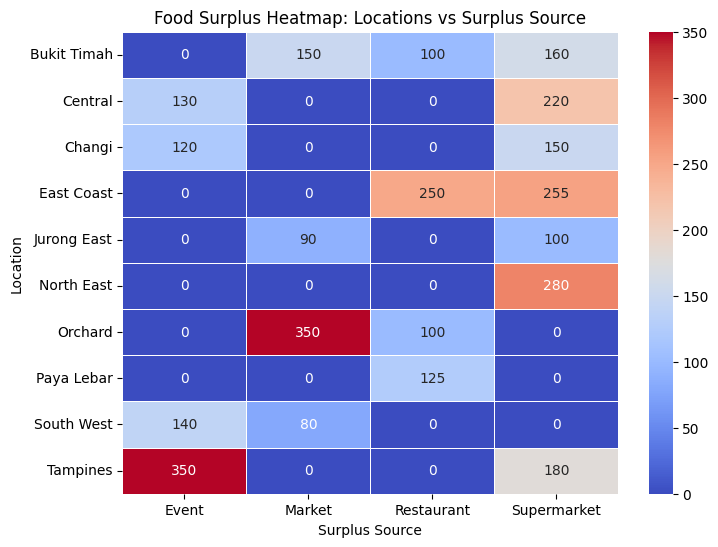

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. BAR CHART: Total Surplus Quantity by Location

# Group by Location and sum up Surplus Quantity
location_surplus = df.groupby("Location", as_index=False)["Surplus Quantity (kg)"].sum()

# Sort in descending order
location_surplus = location_surplus.sort_values(by="Surplus Quantity (kg)", ascending=False)

#  bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Location", y="Surplus Quantity (kg)", data=location_surplus, palette="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f} kg",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)
plt.title("Surplus Food Quantity by Location")
plt.xlabel("Location")
plt.ylabel("Surplus Quantity (kg)")
plt.show()

# 2. HEATMAP: surplus food by location & surplus source
pivot_table = df.pivot_table(values="Surplus Quantity (kg)", index="Location", columns="Surplus Source", aggfunc="sum", fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Food Surplus Heatmap: Locations vs Surplus Source")
plt.ylabel("Location")
plt.xlabel("Surplus Source")
plt.show()

<ipython-input-14-bde8d26dddb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Food Item", y="Surplus Quantity (kg)", data=df, palette="muted", estimator=sum)


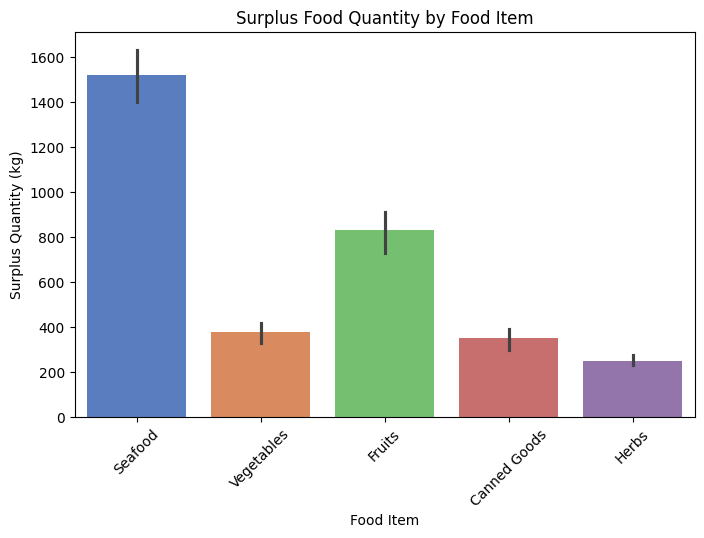

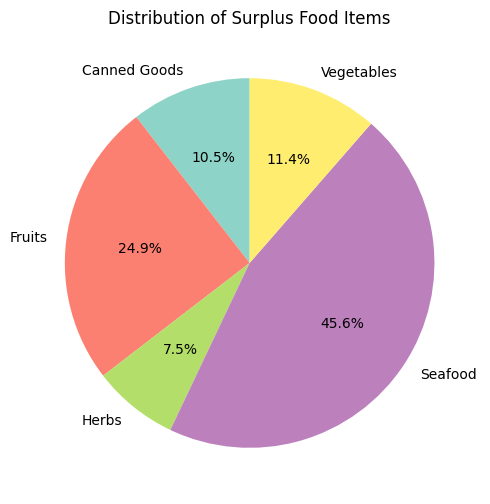

In [ ]:
# 1. BAR CHART: surplus by food item type
plt.figure(figsize=(8,5))
sns.barplot(x="Food Item", y="Surplus Quantity (kg)", data=df, palette="muted", estimator=sum)
plt.xticks(rotation=45)
plt.title("Surplus Food Quantity by Food Item")
plt.xlabel("Food Item")
plt.ylabel("Surplus Quantity (kg)")
plt.show()

# 2. PIE CHART: Proportion of above
plt.figure(figsize=(6,6))
df.groupby("Food Item")["Surplus Quantity (kg)"].sum().plot(kind="pie", autopct='%1.1f%%', cmap="Set3", startangle=90)
plt.ylabel("")
plt.title("Distribution of Surplus Food Items")
plt.show()

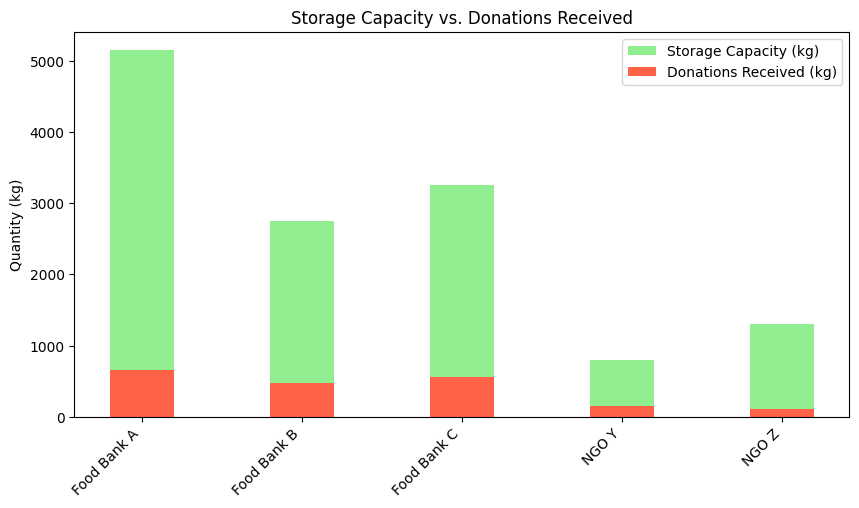

In [ ]:
# Aggregate Data
df_grouped = df.groupby("Charity Location").sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.4
x_labels = df_grouped["Charity Location"]

plt.bar(x_labels, df_grouped["Storage Capacity (kg)"], width=bar_width, label="Storage Capacity (kg)", color="lightgreen")
plt.bar(x_labels, df_grouped["Donations Received (kg)"], width=bar_width, label="Donations Received (kg)", color="tomato")

plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility
plt.ylabel("Quantity (kg)")
plt.title("Storage Capacity vs. Donations Received")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FoodWasteRecyleDataWithGDP-Population2002-2023.csv to FoodWasteRecyleDataWithGDP-Population2002-2023.csv


In [ ]:
#date 11 March 2025
#found new data source but its an image, so let try extracting data from it
import pandas as pd


df = pd.read_csv('FoodWasteRecyleDataWithGDP-Population2002-2023.csv')
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())
df.drop(columns=['Waste Type'], inplace=True)

   Year  Waste Type  Total Food Waste (kt)  Waste Food Disposed (kt)  \
0  2002  Food waste                    526                       495   
1  2003  Food waste                    548                       515   
2  2004  Food waste                    531                       500   
3  2005  Food waste                    532                       495   
4  2006  Food waste                    543                       498   

   Total Food Waste Recycled (kt)  Recycling Rate (%)  \
0                              31                5.93   
1                              33                6.00   
2                              31                5.90   
3                              37                6.90   
4                              45                8.20   

   Avg Monthly Disposal (kt)  Avg Daily Disposal (kt)  \
0                      41.25                     1.36   
1                      42.92                     1.41   
2                      41.67                     1.37

In [ ]:
#check null values and handle it
df.isna().sum()
print(df['National Environment Agency Hawker Stalls'].isna().sum())  # Check NaN count
print(df['National Environment Agency Hawker Stalls'].unique())  # Check unique values
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
print(df.info())

10
[   nan 13410. 13537. 13828. 13440. 13310. 13329. 13401. 13400. 13483.
 13570. 13390. 13430.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Year                                       22 non-null     datetime64[ns]
 1   Total Food Waste (kt)                      22 non-null     int64         
 2   Waste Food Disposed (kt)                   22 non-null     int64         
 3   Total Food Waste Recycled (kt)             22 non-null     int64         
 4   Recycling Rate (%)                         22 non-null     float64       
 5   Avg Monthly Disposal (kt)                  22 non-null     float64       
 6   Avg Daily Disposal (kt)                    22 non-null     float64       
 7   Non-Retail Food Establishments             22 non-null     int64         
 8   Food 

In [ ]:
# Ensure numeric values

df['National Environment Agency Hawker Stalls'] = df['National Environment Agency Hawker Stalls'].fillna(df['National Environment Agency Hawker Stalls'].median())  # Median
# Check NaNs
print(df.isna().sum())

Year                                         0
Total Food Waste (kt)                        0
Waste Food Disposed (kt)                     0
Total Food Waste Recycled (kt)               0
Recycling Rate (%)                           0
Avg Monthly Disposal (kt)                    0
Avg Daily Disposal (kt)                      0
Non-Retail Food Establishments               0
Food Shops                                   0
Food Stalls                                  0
Supermarkets                                 0
National Environment Agency Hawker Stalls    0
Population (000)                             0
GDP per Capita (S$)                          0
dtype: int64


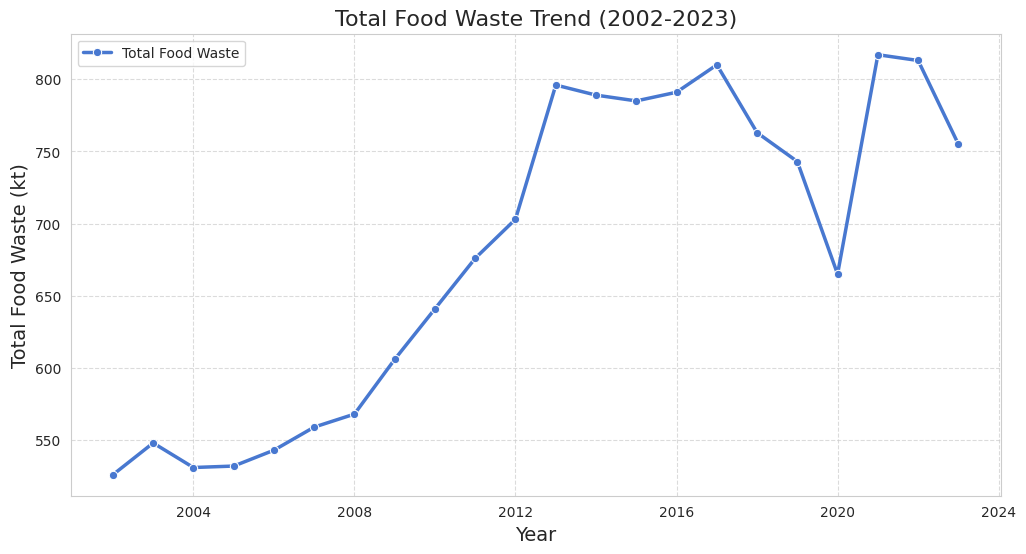

In [ ]:
# Advanced Seaborn Style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

# Calculate year-over-year percentage change
df["Total Food Waste % Change"] = df["Total Food Waste (kt)"].pct_change() * 100
df["Waste Disposed % Change"] = df["Waste Food Disposed (kt)"].pct_change() * 100
df["Waste Recycled % Change"] = df["Total Food Waste Recycled (kt)"].pct_change() * 100


# --- 1. Trend of Total Food Waste Over the Years ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Food Waste (kt)', data=df, marker='o', label="Total Food Waste", linewidth=2.5)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Food Waste (kt)", fontsize=14)
plt.title("Total Food Waste Trend (2002-2023)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


**Insights from the Total Food Waste Trend (2002-2023):**
Food waste has increased over time.

There was a sharp rise between 2008 and 2013, showing a significant increase in food waste.

Waste levels remained high but stable from 2014 to 2019.

After the rapid growth, food waste did not change much during these years, with only minor fluctuations. A sudden **drop in 2020, likely due to COVID-19.**
Food waste spiked again in 2021 and showed some ups and downs afterward, possibly as things returned to normal.

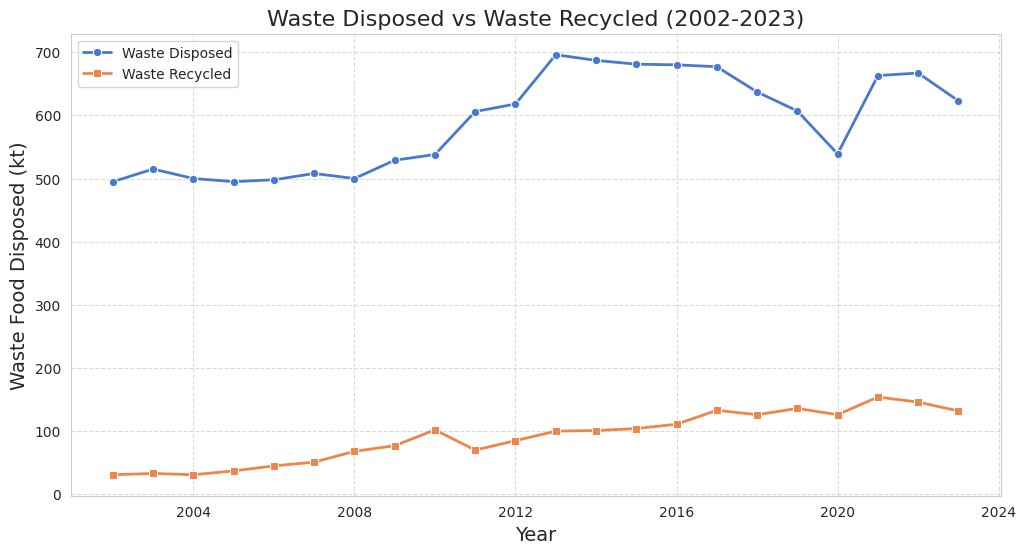

In [ ]:
# --- 2. Waste Disposed vs. Waste Recycled ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Waste Food Disposed (kt)', data=df, marker='o', label="Waste Disposed", linewidth=2)
sns.lineplot(x='Year', y='Total Food Waste Recycled (kt)', data=df, marker='s', label="Waste Recycled", linewidth=2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Waste Food Disposed (kt)", fontsize=14)
plt.title("Waste Disposed vs Waste Recycled (2002-2023)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Insights from Waste Disposed vs. Waste Recycled (2002-2023):**

Despite some improvements, most food waste still ends up being disposed of rather than recycled.

The slow growth in recycling indicates that more efforts are needed to enhance food waste recycling initiatives and infrastructure.

After remaining stable in the early years, waste disposal saw a sharp rise post-2012, highlighting the need for better waste management policies.
A noticeable dip in waste disposal around 2020.

This drop, likely due to COVID-19 restrictions, suggests that food production and consumption patterns have a direct impact on waste generation.
Recycling is increasing but not at a sufficient pace.

Although food waste recycling has grown, its progress is much slower compared to the rise in waste disposal.

<ipython-input-7-0e0e02505e9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Recycling Rate (%)', data=df, palette='coolwarm')


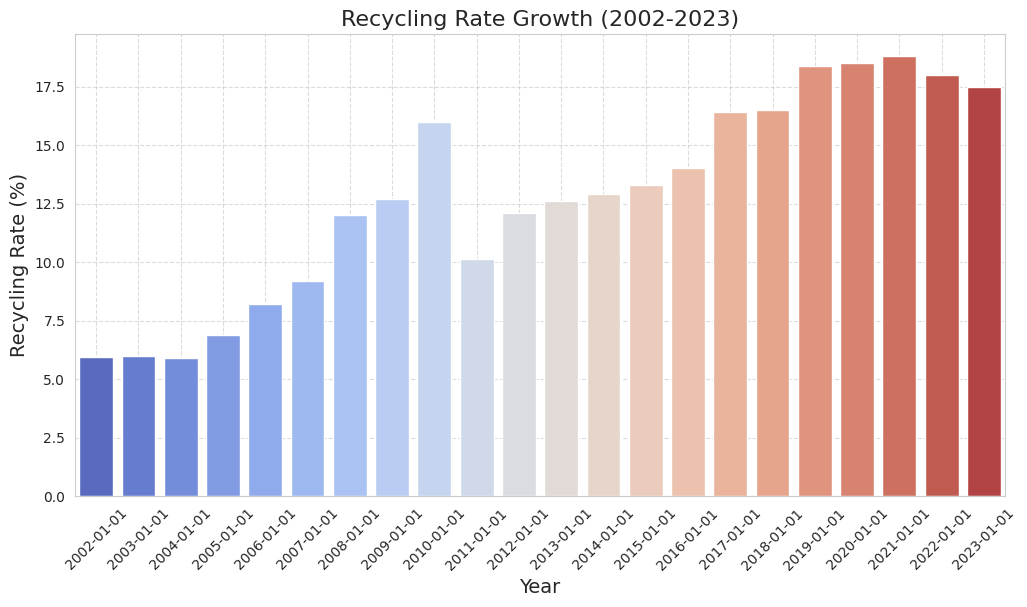

In [ ]:
# --- 3. Recycling Rate Growth ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Recycling Rate (%)', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Recycling Rate (%)", fontsize=14)
plt.title("Recycling Rate Growth (2002-2023)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

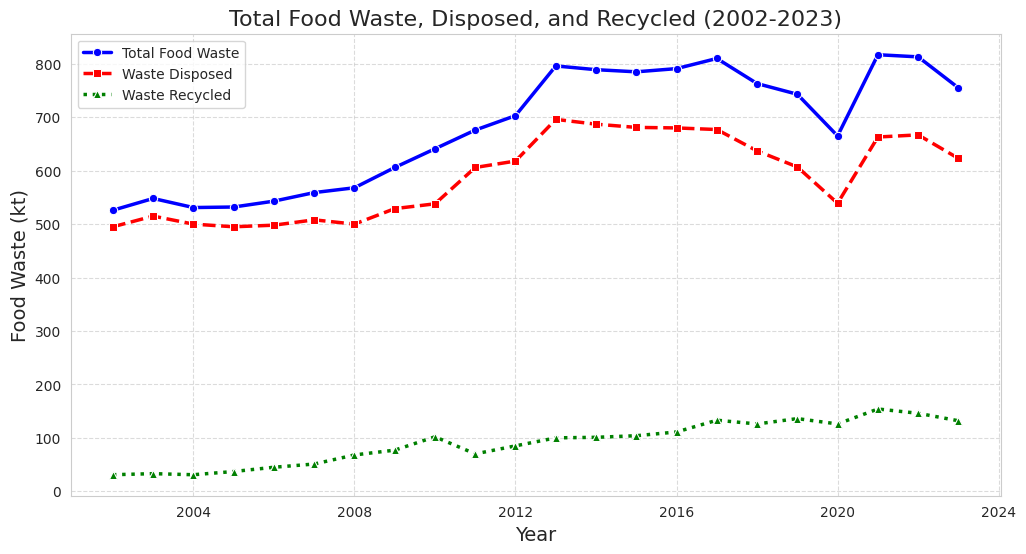

In [ ]:
# ----- 4. Total Waste vs Disposed vs Recyled ----
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Food Waste (kt)', data=df, marker='o', label="Total Food Waste", linewidth=2.5, color="blue")
sns.lineplot(x='Year', y='Waste Food Disposed (kt)', data=df, marker='s', label="Waste Disposed", linewidth=2.5, color="red", linestyle="dashed")
sns.lineplot(x='Year', y='Total Food Waste Recycled (kt)', data=df, marker='^', label="Waste Recycled", linewidth=2.5, color="green", linestyle="dotted")

# Labels & Title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Food Waste (kt)", fontsize=14)
plt.title("Total Food Waste, Disposed, and Recycled (2002-2023)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

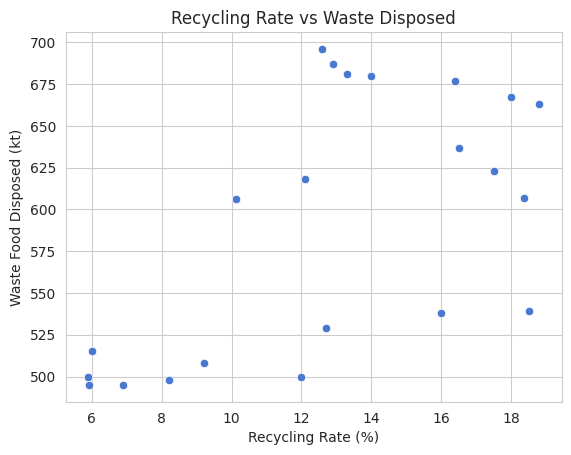

                          Recycling Rate (%)  Waste Food Disposed (kt)
Recycling Rate (%)                  1.000000                  0.610519
Waste Food Disposed (kt)            0.610519                  1.000000


In [ ]:
#Does a higher recycling rate reduce total waste disposal?
# --- 5. Waste Disposed vs. Recycle Rate Corealtion ---
sns.scatterplot(x=df['Recycling Rate (%)'], y=df['Waste Food Disposed (kt)'])
plt.title("Recycling Rate vs Waste Disposed")
plt.show()

print(df[['Recycling Rate (%)', 'Waste Food Disposed (kt)']].corr())  # Check correlation

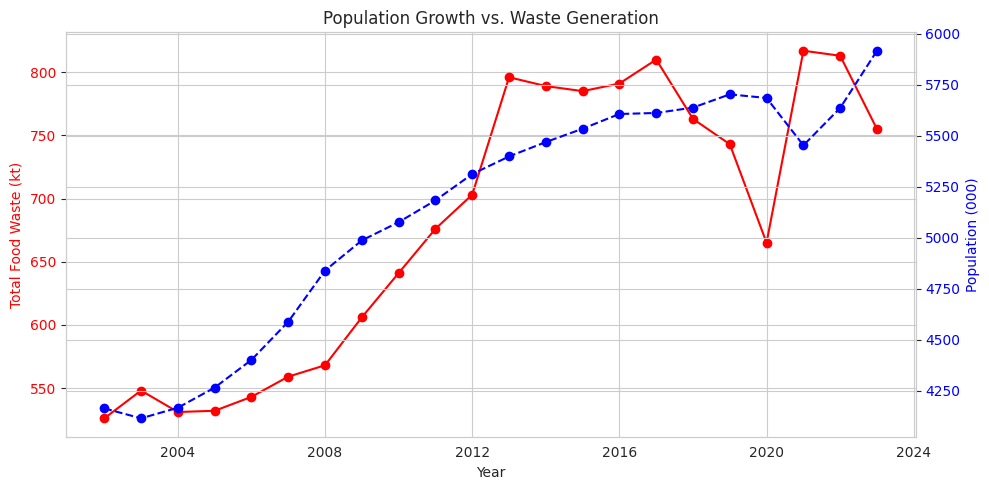

In [ ]:
#Does Population Growth Increase Waste?
# --- 6. Waste Disposed vs. Population Growth ---
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Food Waste (kt)', color='red')
ax1.plot(df['Year'], df['Total Food Waste (kt)'], color='red', marker='o', label="Total Waste")
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Population (000)', color='blue')
ax2.plot(df['Year'], df['Population (000)'], color='blue', marker='o', linestyle='dashed', label="Population")
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Population Growth vs. Waste Generation")
fig.tight_layout()
plt.show()

**Insights from Population Growth vs. Waste Generation (2002-2023):**

**Food waste and population growth are correlated but not always proportional.**

Initially, as the population increased, total food waste also rose steadily. However, fluctuations in waste levels post-2016 suggest other factors may influence waste generation.

**Despite population growth, waste trends show volatility.**

While population growth remains fairly steady, food waste levels fluctuate significantly after 2016, implying that social, economic, or policy-driven factors may be at play.

**Recycling efforts or food consumption habits may influence waste trends.**

The inconsistencies in waste growth compared to population growth indicate that improved recycling programs, changing consumption behaviors, or policy interventions may be impacting waste generation.

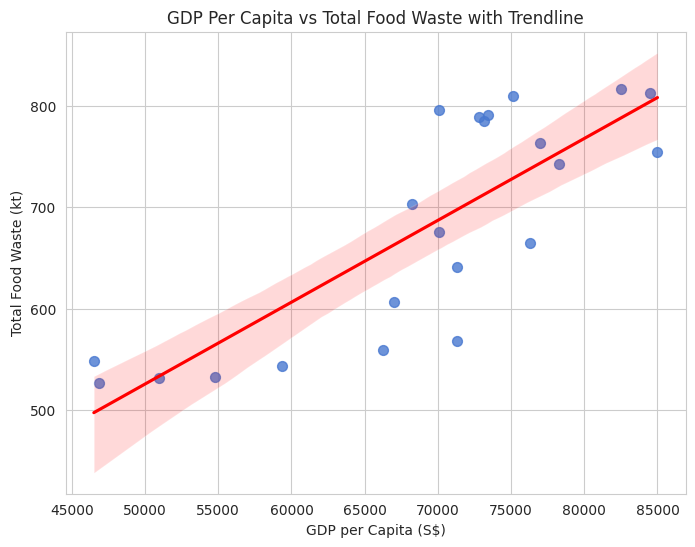

In [ ]:
#Does Higher GDP Per Capita Increase Waste?
# --- 7. Waste Disposed vs. GDP per capita ---

plt.figure(figsize=(8,6))
sns.regplot(x=df['GDP per Capita (S$)'], y=df['Total Food Waste (kt)'], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("GDP Per Capita vs Total Food Waste with Trendline")
plt.xlabel("GDP per Capita (S$)")
plt.ylabel("Total Food Waste (kt)")
plt.show()

**Insights from GDP Per Capita vs. Total Food Waste:**

**Higher GDP per capita is positively correlated with higher food waste.**

The scatter plot and trendline suggest that as GDP per capita increases, total food waste also rises. This could be due to increased consumption, food affordability, and lifestyle changes in wealthier societies.


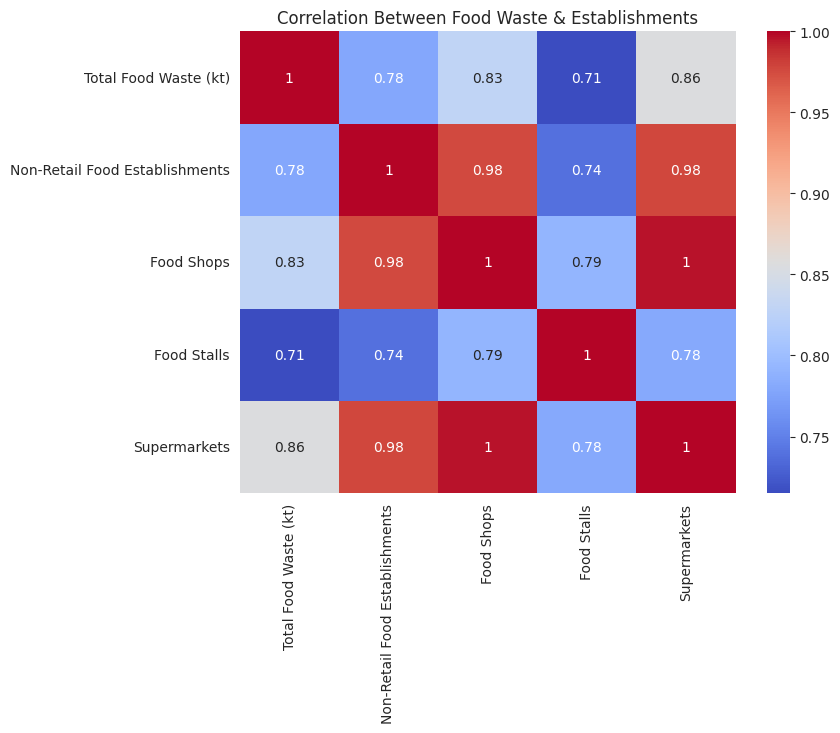

In [ ]:
# --- 8. Waste Disposed vs. Food Establishments ---

plt.figure(figsize=(8,6))
sns.heatmap(df[['Total Food Waste (kt)', 'Non-Retail Food Establishments', 'Food Shops', 'Food Stalls', 'Supermarkets']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Food Waste & Establishments")
plt.show()

**Insights from the Correlation Heatmap:**

**Supermarkets and Food Shops contribute significantly to food waste**

Correlation with Total Food Waste (kt):
Supermarkets: 0.86
Food Shops: 0.83
Non-Retail Food Establishments: 0.78
Food Stalls: 0.71
This suggests that Supermarkets and Food Shops are the biggest sources of food waste among the establishments.

**Non-Retail Food Establishments and Supermarkets are strongly correlated**

Correlation: 0.98
This means areas with more supermarkets tend to have more non-retail food establishments, leading to increased food waste.

**Food Shops and Supermarkets have a perfect correlation (1.00)**

These two categories might be overlapping in the dataset, or they are behaving almost identically in their impact on food waste.

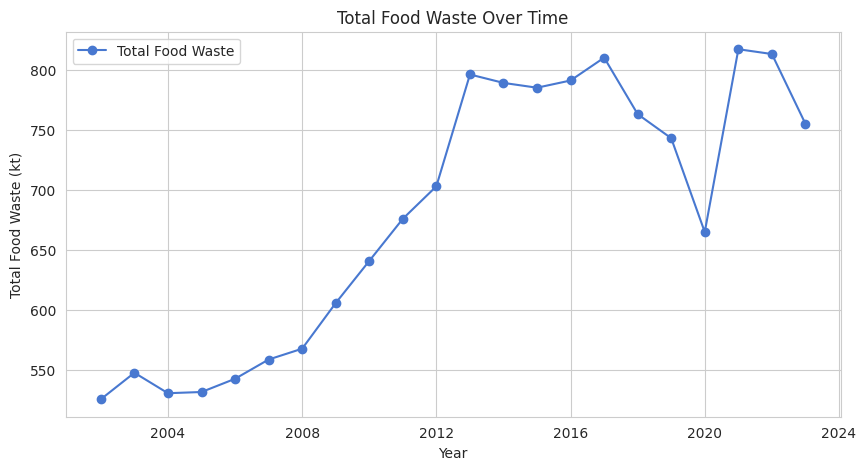

In [ ]:
#date 16 March - check linearity first
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Total Food Waste (kt)"], marker='o', linestyle='-', label="Total Food Waste")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Food Waste (kt)")
plt.title("Total Food Waste Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#looks like no linear data, so lets drop 2020 row as it looks like a anomaly
df.drop(df[ df['Year'].dt.year == 2020].index, inplace=True)
print(df)

         Year  Total Food Waste (kt)  Waste Food Disposed (kt)  \
0  2002-01-01                    526                       495   
1  2003-01-01                    548                       515   
2  2004-01-01                    531                       500   
3  2005-01-01                    532                       495   
4  2006-01-01                    543                       498   
5  2007-01-01                    559                       508   
6  2008-01-01                    568                       500   
7  2009-01-01                    606                       529   
8  2010-01-01                    641                       538   
9  2011-01-01                    676                       606   
10 2012-01-01                    703                       618   
11 2013-01-01                    796                       696   
12 2014-01-01                    789                       687   
13 2015-01-01                    785                       681   
14 2016-01

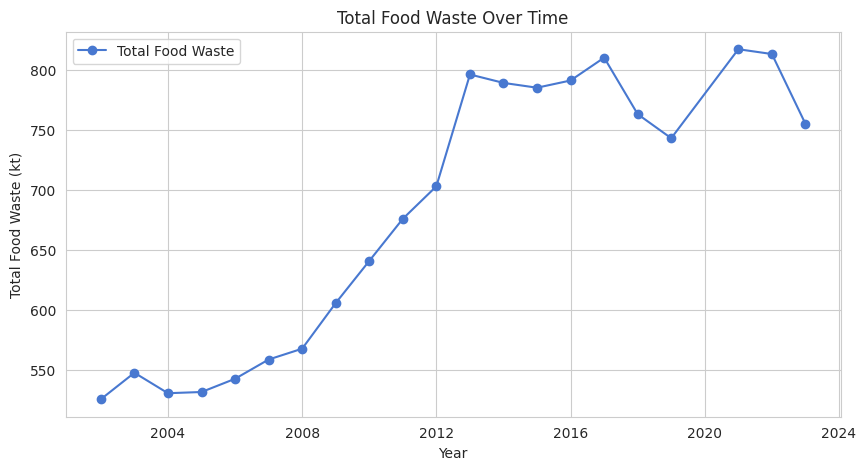

In [ ]:
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Total Food Waste (kt)"], marker='o', linestyle='-', label="Total Food Waste")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Food Waste (kt)")
plt.title("Total Food Waste Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['Year', 'Total Food Waste (kt)', 'Waste Food Disposed (kt)',
       'Total Food Waste Recycled (kt)', 'Recycling Rate (%)',
       'Avg Monthly Disposal (kt)', 'Avg Daily Disposal (kt)',
       'Non-Retail Food Establishments', 'Food Shops', 'Food Stalls',
       'Supermarkets', 'National Environment Agency Hawker Stalls',
       'Population (000)', 'GDP per Capita (S$)', 'Total Food Waste % Change',
       'Waste Disposed % Change', 'Waste Recycled % Change'],
      dtype='object')

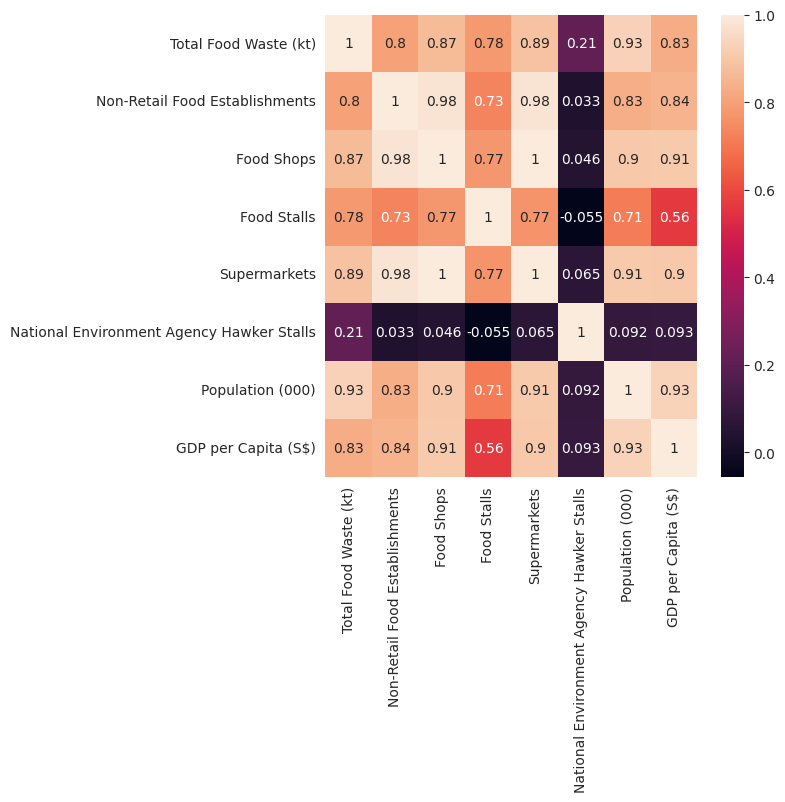

In [ ]:
#data is non linear, and its small so time series models wont be effective. lets try to find most important features first
corr = df[['Total Food Waste (kt)','Non-Retail Food Establishments','Food Shops', 'Food Stalls','Supermarkets','National Environment Agency Hawker Stalls', 'Population (000)','GDP per Capita (S$)' ]].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#above map explaining higher co relation between "non retail food est", "food stalls", "food shop" features, so we have to drop one due to
# prevent multicollinearity issue, we can drop food shops because its same as "non retail food est"
final_features = ['Non-Retail Food Establishments', 'Food Stalls','Supermarkets','National Environment Agency Hawker Stalls', 'Population (000)','GDP per Capita (S$)']
x = df[final_features]
y = df['Total Food Waste (kt)']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)


(16, 6)
(5, 6)


In [ ]:
import numpy as np
import pandas as pd
# Compute correlation matrix
corr = df[['Total Food Waste (kt)','Non-Retail Food Establishments', 'Food Stalls','Supermarkets','National Environment Agency Hawker Stalls', 'Population (000)','GDP per Capita (S$)' ]].corr()


target_corr = corr['Total Food Waste (kt)'].drop('Total Food Waste (kt)')
top_three_features = target_corr.abs().sort_values(ascending = False).head(3).index.tolist()
print(top_three_features)


x = df[top_three_features]
y = df['Total Food Waste (kt)']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

LR_model = LinearRegression()
LR_model.fit(x_train_poly, y_train)

#prediction
y_pred = LR_model.predict(x_test_poly)

#evaluation
print("R2 Score: ", r2_score(y_test,y_pred))
print("MSE : ", np.sqrt(mean_squared_error(y_test,y_pred)))



['Population (000)', 'Supermarkets', 'GDP per Capita (S$)']
R2 Score:  0.8804294059221707
MSE :  37.89364124895384


In [ ]:

# Train XGBoost model
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)

# Predictions
y_pred = xgb.predict(x_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost R² Score:", r2)
print("XGBoost MSE:", mse)

XGBoost R² Score: 0.9618126153945923
XGBoost MSE: 458.59344482421875


In [ ]:
#random forest algo
from sklearn.ensemble import RandomForestRegressor

Rg_model = RandomForestRegressor()

Rg_model.fit(x_train, y_train)

# Predictions
y_pred = Rg_model.predict(x_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest R² Score:", r2)
print("Random Forest MSE:", mse)


Random Forest R² Score: 0.9626000429676311
Random Forest MSE: 449.1375799999995


Best performing model was Random Forest with:

R² Score: 0.965
MSE: ~449

In [ ]:
#save the model
import joblib
joblib.dump(Rg_model,'food_waste_model_rg.pkl')

['food_waste_model_rg.pkl']

In [ ]:
#load the model and predict
model = joblib.load('food_waste_model_rg.pkl')

def predict_food_waste(model, population, super_market, gdp_per_capita):
    input_df = pd.DataFrame([{
        'Population (000)': population,
        'Supermarkets': super_market,
        'GDP per Capita (S$)': gdp_per_capita
    }])
    prediction = model.predict(input_df)
    return prediction[0]

# Predict using 2023 data
predictions = predict_food_waste(model, population=5917.6, super_market=691, gdp_per_capita=85000)
print(f"RF Predicted Food Waste: {predictions:.2f} kt")


RF Predicted Food Waste: 768.14 kt


**Comparison with Real Data (2023)**

Real Food Waste (kt)	755

Predicted Food Waste	769.88

Absolute Error	14.88 kt

Relative Error	~1.97%

**What this tells us:**

This Random Forest model is very close to the real 2023 value — less than 2% error.

For a dataset with only 22 years of data, this level of accuracy is excellent.
It shows the chosen features (Population, Supermarkets, and GDP per Capita) are very predictive of food waste.